# Introduction to the problem

Coronary artery disease involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart. It is the most common of the cardiovascular diseases. In many cases, the first sign is a heart attack.

Diagnosis is not easy and often early stages of the disease are missed. We have gathered data on patients with a suspicion of coronary disease. Let’s try to predict whether our patients have coronary problems.

In dataset `train_set.csv` we have known cases. `test_set.csv` contains some undiagnosed cases that we would like to predict.

### Imports

In [1]:
# We should start with neccessary data imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
sb.set_style('darkgrid')
import sys
import numpy as np
sys.path.append('..')
plt.style.use('fivethirtyeight')

# The following line enables plots in jupyter noteboks
%matplotlib inline

### Loading data ...

In [2]:
# df stands for Dataframe this is one of the core pandas library data structures. Every column in a Dataframe is a Series.
df = pd.read_csv('../data/raw/train_set.csv', sep=',')

Dataset fields:

1. age: age in years  
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
	- Value 1: typical angina
	- Value 2: atypical angina
	- Value 3: non-anginal pain
	- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
	- Value 0: normal
	- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
	- Value 1: upsloping
	- Value 2: flat
	- Value 3: downsloping
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
13. hd: heart disease 0 = healthy, 1 = sick (with at least one major vessels that has > 50% diameter narrowing)

# Data analysis

Let's take a look at the overview of the loaded data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
patientid    358 non-null int64
age          358 non-null int64
sex          358 non-null int64
cp           358 non-null int64
trestbps     358 non-null object
chol         358 non-null object
fbs          358 non-null object
restecg      358 non-null object
thalach      358 non-null object
exang        358 non-null object
oldpeak      358 non-null float64
slope        358 non-null object
thal         358 non-null object
hd           358 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 28.0+ KB


We can see that some of the columns are of type `object` which means that data type is not consistent within these columns. Let's take a look at one of those columns.

In [4]:
df.fbs.value_counts()

0.0    312
1.0     40
?        6
Name: fbs, dtype: int64

It looks like `?` is used to denote missing values. We should use a python `NaN` to describe that.

In [5]:
for column in df:
    if df[column].dtypes == object:
        df[column] = pd.to_numeric(df[column], errors='coerce')

You can save intermediate data so you can reuse it later.

In [6]:
df.to_csv('../data/processed/hdwithnan.csv', sep=',', index=False)

In [7]:
df[df.fbs.isnull()]

patientid  age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
15          27   41    1   4     120.0  237.0  NaN      0.0    138.0    1.0   
32          48   54    0   2     140.0  309.0  NaN      1.0    140.0    0.0   
114        191   46    1   3     150.0  163.0  NaN      0.0    116.0    0.0   
252        419   49    1   4     120.0  297.0  NaN      0.0    132.0    0.0   
272        461   38    0   2     120.0  275.0  NaN      0.0    129.0    0.0   
330        552   53    0   2     113.0  468.0  NaN      0.0    127.0    0.0   

     oldpeak  slope  thal  hd  
15       1.0    2.0   NaN   1  
32       0.0    NaN   NaN   0  
114      0.0    NaN   NaN   0  
252      1.0    2.0   NaN   0  
272      0.0    NaN   NaN   0  
330      0.0    NaN   NaN   0

We should now get an idea about the number and distribution of missing values across our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 14 columns):
patientid    358 non-null int64
age          358 non-null int64
sex          358 non-null int64
cp           358 non-null int64
trestbps     357 non-null float64
chol         344 non-null float64
fbs          352 non-null float64
restecg      357 non-null float64
thalach      357 non-null float64
exang        357 non-null float64
oldpeak      358 non-null float64
slope        248 non-null float64
thal         200 non-null float64
hd           358 non-null int64
dtypes: float64(9), int64(5)
memory usage: 39.2 KB


Look's like most of the columns have almost all values with the exception of `slope` and `thal`.

In [9]:
df.slope.value_counts(dropna=False)

2.0    137
NaN    110
1.0     99
3.0     12
Name: slope, dtype: int64

c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


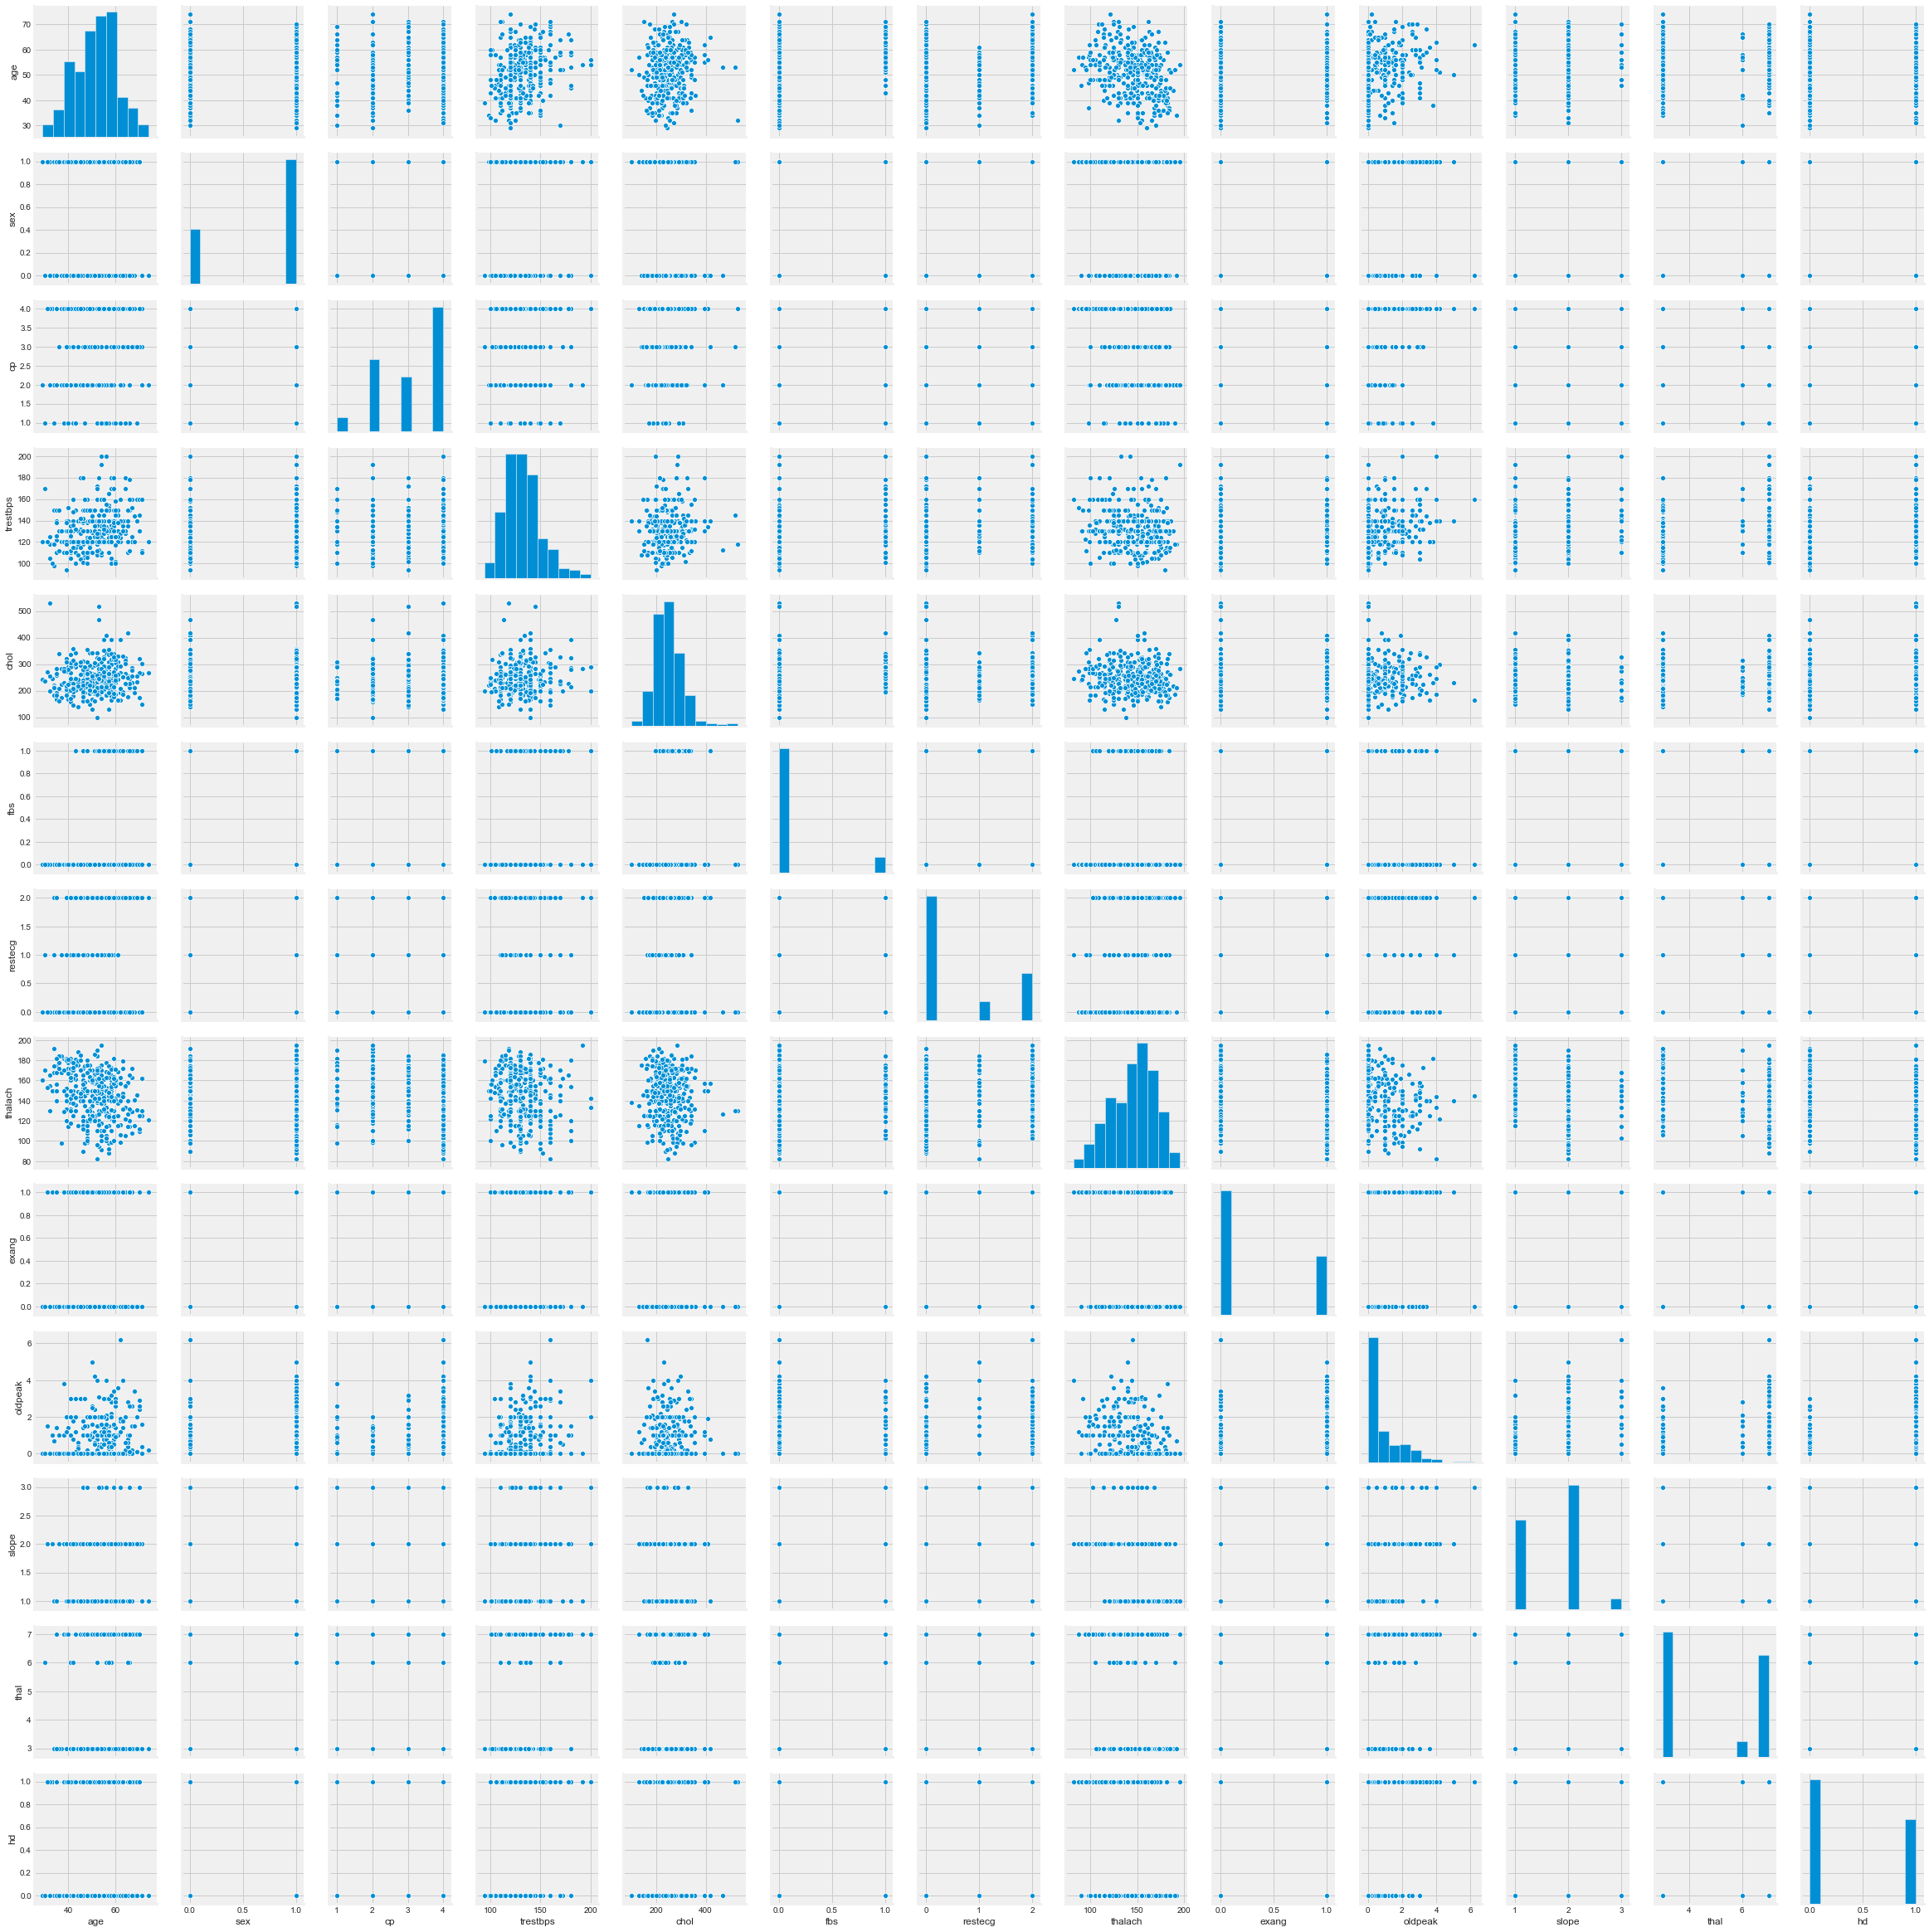

In [10]:
sb.pairplot(df[['age','sex','cp','trestbps','chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'thal', 'hd']])

In [11]:
df.describe()

patientid         age         sex          cp    trestbps        chol  \
count  358.000000  358.000000  358.000000  358.000000  357.000000  344.000000   
mean   297.907821   51.335196    0.695531    3.092179  132.022409  247.898256   
std    173.880347    8.772854    0.460826    0.972965   17.803375   56.462982   
min      0.000000   29.000000    0.000000    1.000000   94.000000  100.000000   
25%    152.250000   45.250000    0.000000    2.000000  120.000000  209.750000   
50%    299.500000   52.000000    1.000000    3.000000  130.000000  242.500000   
75%    455.250000   57.000000    1.000000    4.000000  140.000000  282.000000   
max    596.000000   74.000000    1.000000    4.000000  200.000000  529.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  352.000000  357.000000  357.000000  357.000000  358.000000  248.000000   
mean     0.113636    0.596639  145.207283    0.322129    0.778492    1.649194   
std      0.317821    0.861009   23.287810    0.467948    1.068422    0.570815   
min      0.000000    0.000000   82.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  129.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  147.000000    0.000000    0.100000    2.000000   
75%      0.000000    1.000000  163.000000    1.000000    1.400000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  200.000000  358.000000  
mean     4.875000    0.405028  
std      1.951517    0.491585  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

Let's see how many rows have complete data.

In [12]:
df_withoutna = df.dropna()

In [13]:
df_withoutna.describe()

patientid         age         sex          cp    trestbps        chol  \
count  191.00000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean   300.60733   54.172775    0.664921    3.183246  132.104712  247.287958   
std    168.02947    8.932289    0.473258    0.941964   17.828408   51.769589   
min      0.00000   34.000000    0.000000    1.000000   94.000000  131.000000   
25%    172.00000   48.000000    0.000000    2.500000  120.000000  209.500000   
50%    307.00000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    446.50000   60.000000    1.000000    4.000000  140.000000  282.000000   
max    595.00000   74.000000    1.000000    4.000000  200.000000  417.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean     0.157068    0.910995  150.890052    0.356021    0.974869    1.581152   
std      0.364821    0.993365   22.610977    0.480080    1.140682    0.600404   
min      0.000000    0.000000   88.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  133.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  155.000000    0.000000    0.600000    2.000000   
75%      0.000000    2.000000  168.000000    1.000000    1.600000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  191.000000  191.000000  
mean     4.853403    0.434555  
std      1.959988    0.497001  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

Let's fill data by fixed value.

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # only for numeric values
imputer.fit(df)
matrix_median_na = imputer.transform(df)

### Imputer [doc](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
#### Strategy : string, optional (default=”mean”)
The imputation strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.<br>
If “median”, then replace missing values using the median along each column. Can only be used with numeric data.<br>
If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.<br>
If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.<br>

In [15]:
df_median_na = pd.DataFrame(matrix_median_na, columns=df.columns)
df_median_na.describe()

patientid         age         sex          cp    trestbps        chol  \
count  358.000000  358.000000  358.000000  358.000000  358.000000  358.000000   
mean   297.907821   51.335196    0.695531    3.092179  132.016760  247.687151   
std    173.880347    8.772854    0.460826    0.972965   17.778744   55.354712   
min      0.000000   29.000000    0.000000    1.000000   94.000000  100.000000   
25%    152.250000   45.250000    0.000000    2.000000  120.000000  211.000000   
50%    299.500000   52.000000    1.000000    3.000000  130.000000  242.500000   
75%    455.250000   57.000000    1.000000    4.000000  140.000000  278.500000   
max    596.000000   74.000000    1.000000    4.000000  200.000000  529.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  358.000000  358.000000  358.000000  358.000000  358.000000  358.000000   
mean     0.111732    0.594972  145.212291    0.321229    0.778492    1.756983   
std      0.315477    0.860381   23.255364    0.467602    1.068422    0.501699   
min      0.000000    0.000000   82.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000  129.250000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  147.000000    0.000000    0.100000    2.000000   
75%      0.000000    1.000000  163.000000    1.000000    1.400000    2.000000   
max      1.000000    2.000000  195.000000    1.000000    6.200000    3.000000   

             thal          hd  
count  358.000000  358.000000  
mean     4.047486    0.405028  
std      1.729779    0.491585  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      6.000000    1.000000  
max      7.000000    1.000000

### Data balance

In [16]:
df.hd.value_counts()

0    213
1    145
Name: hd, dtype: int64

In [17]:
df_withoutna.hd.value_counts()

0    108
1     83
Name: hd, dtype: int64

In [18]:
df_median_na.hd.value_counts()

0.0    213
1.0    145
Name: hd, dtype: int64

### Variance

We should make sure that data are not univariate or have to little variance. Such data would only add noise to our future model.

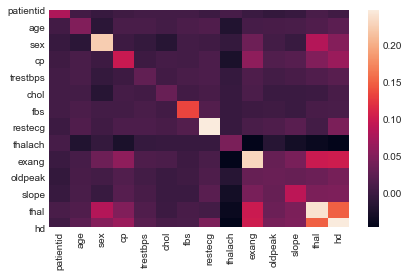

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_values = min_max_scaler.fit_transform(df_withoutna.values)
sb.heatmap(np.cov(normalized_values, rowvar=False), xticklabels=df_withoutna.columns, yticklabels=df_withoutna.columns)

# Split data

In [20]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['hd'], axis=1).values
y = df['hd'].values
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.3, random_state=24)

# Process data flow

In [21]:
imputer = SimpleImputer(strategy="median") # only for numeric values
imputer.fit(x_train)
x_train_median_na = imputer.transform(x_train)
x_train_df = pd.DataFrame(x_train_median_na, columns=[column for column in df.columns if column != "hd"])

### Feature selection

Patientid should be dropped. It's a unique value across the column.

In [22]:
x_train_df.drop(columns=['patientid'], inplace=True, axis=1)

### Feature engineering

Can we create new features based on existing data?

##### Process train data

In [23]:
AVG_MALE_AGE = 74
AVG_FEMALE_AGE = 82
sex_age = x_train_df.apply(lambda row: row["age"]/AVG_MALE_AGE if row["sex"] == 1 else row["age"]/AVG_FEMALE_AGE, axis=1)

In [24]:
x_train_df["sex_age"] = sex_age
x_train_df.drop(columns=["age"], inplace=True)

In [25]:
x_train_df.describe()

sex          cp    trestbps        chol         fbs     restecg  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.668000    3.096000  132.688000  245.392000    0.092000    0.628000   
std      0.471876    0.981139   17.761886   52.203863    0.289606    0.869852   
min      0.000000    1.000000  100.000000  100.000000    0.000000    0.000000   
25%      0.000000    2.000000  120.000000  209.250000    0.000000    0.000000   
50%      1.000000    3.000000  130.000000  240.000000    0.000000    0.000000   
75%      1.000000    4.000000  140.000000  273.750000    0.000000    2.000000   
max      1.000000    4.000000  200.000000  468.000000    1.000000    2.000000   

          thalach       exang     oldpeak       slope        thal     sex_age  
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000  
mean   146.024000    0.296000    0.738800    1.760000    4.036000    0.674755  
std     23.444702    0.457407    1.038561    0.497383    1.724704    0.116109  
min     82.000000    0.000000    0.000000    1.000000    3.000000    0.365854  
25%    130.000000    0.000000    0.000000    1.000000    3.000000    0.597561  
50%    148.000000    0.000000    0.000000    2.000000    3.000000    0.686058  
75%    163.000000    1.000000    1.375000    2.000000    6.000000    0.756757  
max    195.000000    1.000000    5.000000    3.000000    7.000000    0.945946

In [26]:
x_train = x_train_df.values

##### Process test data

In [27]:
def process_test_data(x_test, imputer):
    x_test_median_na = imputer.transform(x_test)
    x_test_df = pd.DataFrame(x_test_median_na, columns=[column for column in df.columns if column != "hd"])
    x_test_df.drop(columns=['patientid'], inplace=True, axis=1)
    test_sex_age = x_test_df.apply(lambda row: row["age"]/AVG_MALE_AGE if row["sex"] == 1 else row["age"]/AVG_FEMALE_AGE, axis=1)
    x_test_df["sex_age"] = test_sex_age
    x_test_df.drop(columns=["age"], inplace=True)
    return x_test_df.values

In [28]:
x_validate = process_test_data(x_validate, imputer)

# Model

Let's create our first model for this problem.

In [29]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### kNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_validate)
print(accuracy_score(y_validate, knn_pred))

0.6759259259259259


Our achieved accuracy is not very impressive. We can try to make it better.

### Decision Tree

In [31]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_validate)
print(accuracy_score(y_validate, tree_pred))

0.7037037037037037


### Logistic Regression

In [32]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
lr_pred = log_reg.predict(x_validate)
print(accuracy_score(y_validate, lr_pred))

0.7962962962962963


c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### kNN
Scaled data

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_scaled_train = standard_scaler.fit_transform(x_train)
x_scaled_validate = standard_scaler.transform(x_validate)

In [34]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(x_scaled_train, y_train)
knn_s_pred = knn_scaled.predict(x_scaled_validate)
print(accuracy_score(y_validate, knn_s_pred))

0.8148148148148148


### Hyperparamter tuning

Now that we have a baseline model ready let's try to boost it's performance but choosing the best hyperparameters.

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_params = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = 1)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
c:\users\mrajewsk\desktop\ai_aware\digital-wks-dsc\env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [38]:
gs_results.best_score_

0.72

### Loading unknown data ...

In [39]:
test_df = pd.read_csv('../data/raw/test_set.csv', sep=',')

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
patientid    239 non-null int64
age          239 non-null int64
sex          239 non-null int64
cp           239 non-null int64
trestbps     239 non-null float64
chol         239 non-null object
fbs          239 non-null object
restecg      239 non-null float64
thalach      239 non-null float64
exang        239 non-null float64
oldpeak      239 non-null float64
slope        239 non-null object
thal         239 non-null object
dtypes: float64(5), int64(4), object(4)
memory usage: 20.6+ KB


We can change missing values to `NaN` easily.

In [41]:
for column in test_df:
    if test_df[column].dtypes == object:
        test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
patientid    239 non-null int64
age          239 non-null int64
sex          239 non-null int64
cp           239 non-null int64
trestbps     239 non-null float64
chol         230 non-null float64
fbs          237 non-null float64
restecg      239 non-null float64
thalach      239 non-null float64
exang        239 non-null float64
oldpeak      239 non-null float64
slope        159 non-null float64
thal         129 non-null float64
dtypes: float64(9), int64(4)
memory usage: 24.3 KB


We have to evaluate all the rows so we have to handle `NaN` values otherwise our model will not be able to do predictions on all of them.

In [43]:
x_test = test_df.values
x_test = process_test_data(x_test, imputer)

Check unknown data

In [44]:
test_df_to_show = pd.DataFrame(x_test, columns=[column for column in test_df.columns if column!="patientid"])
test_df_to_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 12 columns):
age         239 non-null float64
sex         239 non-null float64
cp          239 non-null float64
trestbps    239 non-null float64
chol        239 non-null float64
fbs         239 non-null float64
restecg     239 non-null float64
thalach     239 non-null float64
exang       239 non-null float64
oldpeak     239 non-null float64
slope       239 non-null float64
thal        239 non-null float64
dtypes: float64(12)
memory usage: 22.5 KB


Time to import our special function for prediction generation for unknown values.

In [45]:
from src.process_data import save_model_predictions_to_file

We have to supply the list of patientids that we are predicting since our input data might not include it.

In [46]:
save_model_predictions_to_file("../data/processed/predictions.csv", gs.best_estimator_, test_df.patientid, x_test)